In [1]:
import random
import seaborn as sns
import pandas as pd

## Summary

In [30]:
errors = pd.read_csv('../swis_combined_nn_results/all_fc_errors.csv', index_col=0)

errors = errors.groupby(['model_name','Level']).agg({'error': ['mean', 'median', 'std', 'min']})

errors.sort_values(by =('error', 'mean'))

error                      \
                                                   mean    median       std   
model_name                              Level                                 
concat_pc_with_grid_tcn2_for_cluster    pc     0.150190  0.150522  0.007301   
grid_conv_in_each_pc_seperately         pc     0.160594  0.161032  0.005980   
concat_pc_with_grid_tcn2                grid   0.168919  0.166838  0.012649   
SWIS_APPROACH_A_more_layer_without_norm grid   0.172150  0.169410  0.009501   
concat_pc_with_grid_tcn3                grid   0.173473  0.172374  0.007831   

                                                         
                                                    min  
model_name                              Level            
concat_pc_with_grid_tcn2_for_cluster    pc     0.139596  
grid_conv_in_each_pc_seperately         pc     0.151910  
concat_pc_with_grid_tcn2                grid   0.152105  
SWIS_APPROACH_A_more_layer_without_norm grid   0.159659  
concat_pc_with_grid_tcn3                grid   0.161368

## New Results with Different Architectures

In [29]:
errors = pd.read_csv('../swis_combined_nn_results/all_errors_new.csv', index_col=0)

errors = errors.groupby(['model_name','Level']).agg({'error': ['mean', 'median', 'std', 'min']})

errors.sort_values(by =('error', 'mean'))

error                       \
                                                    mean    median        std   
model_name                              Level                                   
grid_conv_in_each_pc_seperately         pc      0.160594  0.161032   0.005980   
concat_pc_with_grid_tcn2                grid    0.168919  0.166838   0.012649   
concat_pc_with_grid_tcn3                grid    0.173473  0.172374   0.007831   
concat_pc_with_grid_at_each_tcn         grid    0.174864  0.174212   0.008886   
concat_pc_with_grid_tcn                 grid    0.175837  0.176203   0.005134   
concat_pc_with_grid_tcn4                grid    0.177819  0.173634   0.018047   
concat_pc_with_grid_tcn6                grid    0.180986  0.175980   0.013974   
concat_pc_with_grid_tcn2_lr             grid    0.182394  0.178423   0.024390   
concat_pc_with_grid_tcn2_new            grid    0.182958  0.180930   0.006469   
concat_pc_with_grid_tcn5                grid    0.185268  0.183299   0.013184   
concat_pc_with_grid_tcn2_concat_at_end  grid    0.188908  0.192371   0.015362   
concat_pc_with_grid_tcn4_lr             grid    0.193194  0.189542   0.029093   
concat_pc_with_grid_tcn2_with_layernorm grid    0.198420  0.192576   0.033174   
concat_pc_with_grid_tcn2_relu_and_norm  grid    0.201088  0.186653   0.043398   
SWIS_APPROACH_A_with_weather_only       grid    0.209063  0.199585   0.023738   
pc_2d_conv_with_grid_tcn_method2        grid    0.212163  0.211519   0.014281   
concat_pc_with_grid_tcn2_with_batchnorm grid    0.260842  0.246636   0.053630   
pc_2d_conv_with_grid_tcn                grid    0.270816  0.268378   0.017586   
conv_3d_model_2                         grid    1.254502  1.275877   0.226963   
conv_3d_model                           grid    1.346971  1.369716   0.221908   
concat_pc_with_grid_tcn2_lr_decay       grid   15.187445  1.844548  41.970418   

                                                         
                                                    min  
model_name                              Level            
grid_conv_in_each_pc_seperately         pc     0.151910  
concat_pc_with_grid_tcn2                grid   0.152105  
concat_pc_with_grid_tcn3                grid   0.161368  
concat_pc_with_grid_at_each_tcn         grid   0.161057  
concat_pc_with_grid_tcn                 grid   0.168053  
concat_pc_with_grid_tcn4                grid   0.157103  
concat_pc_with_grid_tcn6                grid   0.168944  
concat_pc_with_grid_tcn2_lr             grid   0.148099  
concat_pc_with_grid_tcn2_new            grid   0.174604  
concat_pc_with_grid_tcn5                grid   0.172181  
concat_pc_with_grid_tcn2_concat_at_end  grid   0.165222  
concat_pc_with_grid_tcn4_lr             grid   0.165276  
concat_pc_with_grid_tcn2_with_layernorm grid   0.160740  
concat_pc_with_grid_tcn2_relu_and_norm  grid   0.173684  
SWIS_APPROACH_A_with_weather_only       grid   0.183421  
pc_2d_conv_with_grid_tcn_method2        grid   0.189008  
concat_pc_with_grid_tcn2_with_batchnorm grid   0.185993  
pc_2d_conv_with_grid_tcn                grid   0.246424  
conv_3d_model_2                         grid   0.892371  
conv_3d_model                           grid   1.043510  
concat_pc_with_grid_tcn2_lr_decay       grid   1.295682

## Plots and Result Tables

In [2]:
# bottom up aggregation results
hf_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors.csv', index_col=0)

In [3]:
hf_df.head()

,run,sample,category,method,error
0,0,0,0,naive,0.322681
1,0,0,0,arima,0.321692
2,0,0,0,conventional_lstm,0.231297
3,1,0,0,conventional_lstm,0.246363
4,2,0,0,conventional_lstm,0.233219


In [4]:
# this will take the mean across runs

temp_df = hf_df.groupby(['sample', 'category', 'method']).agg({'error': 'mean'}).reset_index()

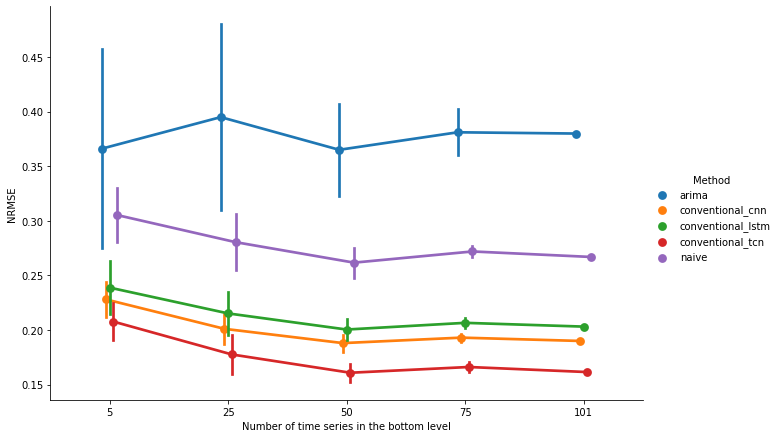

In [5]:
plt_benchmark = sns.catplot(data=temp_df, x='category', y='error', hue='method', kind="point", ci='sd',
                dodge=True, figsize=(20,70), height=6, aspect=1.5)
plt_benchmark.set_xticklabels(['5', '25', '50', '75', '101'])
plt_benchmark.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
plt_benchmark._legend.set_title('Method')

In [64]:
def get_df_method(approach_df, method_name):
    runs = approach_df.values
    df = []

    for run in range(0,len(runs)):
        df.append([run, 0, 4, method_name, runs[run][0]])
        
    return pd.DataFrame(df, columns=['run', 'sample', 'category', 'method', 'error'])


# methodA 101 results
approachA = pd.read_csv('../swis_combined_nn_results/approachA/SWIS_APPROACH_A_more_layer_without_norm/errors/final_errors.csv', index_col=0)

#methodB 101 results
approachB = pd.read_csv('../swis_combined_nn_results/approachB/SWIS_APPROACH_B/errors/final_errors.csv', index_col=0)

df_A = get_df_method(approachA, 'method-A')

# append these to bottom up table
new_hf_df = hf_df.append(df_A, ignore_index=True)

In [66]:
# method A category results
methodA_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_methodA.csv', index_col=0)

In [67]:
# append them together
new_hf_df = new_hf_df.append(methodA_df, ignore_index=True)

In [68]:
# ensemble_df = pd.read_csv('../swis_ts_data/hf_dataframe_errors_ensemble.csv', index_col=0)
# new_hf_df = new_hf_df.append(ensemble_df, ignore_index=True)

In [69]:
# we will take the mean across runs
# temp_df2 = new_hf_df.loc[new_hf_df['method'].isin(['ensemble', 'conventional_tcn', 'method-A'])]

In [70]:
# temp_df2 = temp_df2.groupby(['sample', 'category', 'method']).agg({'error': 'mean'}).reset_index()

In [73]:
new_hf_df = new_hf_df.replace('naive', 'Naive - Using PC data')
new_hf_df = new_hf_df.replace('conventional_cnn', 'CNN - Using PC data')
new_hf_df = new_hf_df.replace('conventional_lstm', 'LSTM - Using PC data')
new_hf_df = new_hf_df.replace('conventional_tcn', 'TCN - Using PC data')
new_hf_df = new_hf_df.replace('method-A', 'Our Approach - 1D TCN')

In [75]:
new_hf_df = new_hf_df.replace('arima', 'ARIMA - Using PC data')

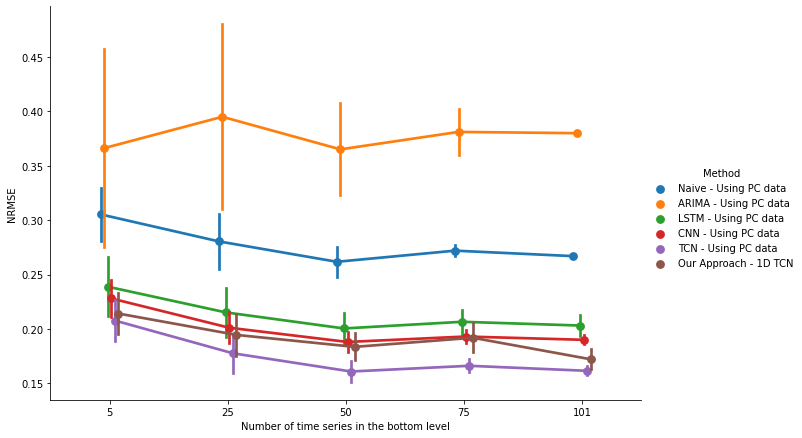

In [76]:
# final plot


plt_all_data = sns.catplot(data=new_hf_df, x='category', y='error', hue='method', kind="point", ci='sd',
                dodge=True, figsize=(20,70), height=6, aspect=1.5)
plt_all_data.set_xticklabels(['5', '25', '50', '75', '101'])
plt_all_data.set(xlabel='Number of time series in the bottom level', ylabel='NRMSE')
plt_all_data._legend.set_title('Method')

In [37]:
table = temp_df2.groupby(by=['category', 'method']).agg({'error': ['mean', 'median', 'std', 'min']})

table.to_csv('../swis_ts_data/comparison.csv')

In [38]:
table

error                              
                               mean    median       std       min
category method                                                  
0        conventional_tcn  0.207779  0.206735  0.017958  0.174330
         ensemble          0.196572  0.198051  0.016722  0.166897
         method-A          0.214200  0.217654  0.017650  0.185907
1        conventional_tcn  0.177676  0.173848  0.018376  0.153052
         ensemble          0.172507  0.170366  0.017945  0.146261
         method-A          0.194569  0.194405  0.017568  0.168199
2        conventional_tcn  0.160939  0.159869  0.008859  0.150856
         ensemble          0.158840  0.159529  0.008398  0.144872
         method-A          0.183571  0.182567  0.009254  0.167150
3        conventional_tcn  0.166191  0.166096  0.004597  0.158683
         ensemble          0.166663  0.164446  0.006125  0.158619
         method-A          0.191967  0.191531  0.008243  0.182948
4        conventional_tcn  0.161564  0.161564       NaN  0.161564
         ensemble          0.160646  0.160646       NaN  0.160646
         method-A          0.172150  0.172150       NaN  0.172150

In [23]:
test_err= new_hf_df.groupby(['sample', 'category', 'method']).agg({'error': ['mean', 'min', 'std']}).reset_index()

In [24]:
test_err.loc[test_err['category']==4]

sample category             method     error                    
                                           mean       min       std
28      0        4              arima  0.379956  0.379956       NaN
29      0        4   conventional_cnn  0.190054  0.185353  0.004253
30      0        4  conventional_lstm  0.203182  0.183753  0.010369
31      0        4   conventional_tcn  0.161564  0.155611  0.004206
32      0        4           ensemble  0.160646  0.146273  0.008402
33      0        4           method-A  0.172150  0.159659  0.009501
34      0        4              naive  0.266963  0.266963       NaN

In [117]:
tcn = new_hf_df.loc[new_hf_df['method'] == 'TCN - Using PC data']
tcn.loc[tcn['category'] == 4]

,run,sample,category,method,error
1302,0,0,4,TCN - Using PC data,0.167371
1303,1,0,4,TCN - Using PC data,0.160375
1304,2,0,4,TCN - Using PC data,0.158487
1305,3,0,4,TCN - Using PC data,0.158679
1306,4,0,4,TCN - Using PC data,0.161046
1307,5,0,4,TCN - Using PC data,0.161824
1308,6,0,4,TCN - Using PC data,0.158264
1309,7,0,4,TCN - Using PC data,0.155611
1310,8,0,4,TCN - Using PC data,0.166388
1311,9,0,4,TCN - Using PC data,0.167592


In [6]:
# new_errors = pd.read_csv('../swis_combined_nn_results/all_errors.csv', index_col=0)

In [7]:
# new_errors.groupby(['model_name','Level']).agg({'error': ['mean', 'median', 'std', 'min']})

In [8]:
# new_errors = pd.read_csv('../swis_combined_nn_results/all_errors.csv', index_col=0)
# new_errors.groupby(['model_name','Level']).agg({'error': ['mean', 'median', 'std', 'min']})

In [9]:
# new_errors2 = pd.read_csv('../swis_combined_nn_results/all_errors_new.csv', index_col=0)

# new_errors2.loc[new_errors2['model_name'] == 'concat_pc_with_grid_tcn2_lr'][['model_name', 'error']]

In [12]:
# conv3d__errors = new_errors2.loc[new_errors2['model_name'] == 'conv_3d_model'][['model_name', 'error']]

In [13]:
# tcn_results = tcn.loc[tcn['category'] == 4][['method', 'error']].rename(columns = {'method': 'model_name'})

In [14]:
# conv1d_approach2 = new_errors2.loc[new_errors2['model_name'] == 'concat_pc_with_grid_tcn2'][['model_name', 'error']]

In [15]:
# conv_1d_approach1 = new_hf_df.loc[new_hf_df['method'] == 'Our Approach - 1D TCN']
# conv_1d_approach1 = conv_1d_approach1.loc[conv_1d_approach1['category'] == 4][['method', 'error']].rename(columns = {'method': 'model_name'})

In [16]:
# conv2d_approach = new_errors2.loc[new_errors2['model_name'] == 'pc_2d_conv_with_grid_tcn_method2'][['model_name', 'error']]

In [103]:
# data_plt = tcn_results.append(conv1d_approach2).append(conv_1d_approach1).append(conv2d_approach).append(conv3d__errors)

In [17]:
# data_plt = data_plt.replace('concat_pc_with_grid_tcn2', 'Our Approach 2 1D TCN')
# data_plt = data_plt.replace('pc_2d_conv_with_grid_tcn_method2', 'Our Approach 2D Conv')
# data_plt = data_plt.replace('conv_3d_model', 'Our Approach 3D Conv')

# data_plt = data_plt.rename(columns = {'model_name': 'Method', 'error': 'NRMSE'})

In [18]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# sns.set_theme(style="whitegrid")

# plt.figure(figsize=(16, 10))
# ax = sns.barplot(x="NRMSE", y="Method", data=data_plt, capsize=.2)

## Explore the loss curve

In [19]:
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)

In [20]:
# def plot_loss():
# #     loss1 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_2d_1')
# #     loss2 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_2d_2')
#     loss3 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_approachA')
#     loss4 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_weatherA')
#     loss5 = pd.read_pickle(f'../swis_combined_nn_results/training_loss_grid_iteration_weatherB')


#     fig = go.Figure()

# #     fig.add_trace(go.Scatter(y= loss1['loss']))
# #     fig.add_trace(go.Scatter(y= loss2['loss']))
#     fig.add_trace(go.Scatter(y= loss3['loss']))
#     fig.add_trace(go.Scatter(y= loss4['loss']))
#     fig.add_trace(go.Scatter(y= loss5['loss']))

#     fig.show()

In [21]:
# plot_loss()

## Plot Data

In [22]:
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode, iplot
# init_notebook_mode(connected=True)

In [23]:
# path = '../swis_combined_nn_results/new_models/concat_pc_with_grid_tcn2'

# all_fc = []

# for run in range(0, 10):
#     data = pd.read_csv(f'{path}/{run}/grid.csv')
#     if run == 0:
#         all_fc.append(data)
#     else:
#         all_fc.append(data[['fc']].rename(columns = {'fc': str(run)}))

In [24]:
# fc_dataframe = pd.concat(all_fc, axis=1)

In [25]:
# list_col = fc_dataframe.columns

In [26]:
# list_col

In [27]:
# fig = go.Figure()

# for col in list_col[1:]:
#     fig.add_trace(go.Scatter(x = fc_dataframe['date_str'], y = fc_dataframe[col]))

In [28]:
# fig.show()